In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten

Using TensorFlow backend

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path1 = '/content/drive/My Drive/chest_xray/train'
valid_path1 = '/content/drive/My Drive/chest_xray/test'

#VGG-16

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/My Drive/chest_xray/train/*')
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('/content/drive/My Drive/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=6,
  steps_per_epoch=len(training_set), validation_steps=len(test_set)
)

Epoch 1/6
522/522 [==============================] - 1080s 2s/step - loss: 0.2032 - accuracy: 0.9289 - val_loss: 0.2538 - val_accuracy: 0.9199
Epoch 2/6
522/522 [==============================] - 133s 255ms/step - loss: 0.1439 - accuracy: 0.9509 - val_loss: 0.3176 - val_accuracy: 0.9167
Epoch 3/6
522/522 [==============================] - 132s 254ms/step - loss: 0.1343 - accuracy: 0.9594 - val_loss: 0.7802 - val_accuracy: 0.8526
Epoch 4/6
522/522 [==============================] - 134s 256ms/step - loss: 0.1042 - accuracy: 0.9657 - val_loss: 0.4248 - val_accuracy: 0.9071
Epoch 5/6
522/522 [==============================] - 132s 253ms/step - loss: 0.1377 - accuracy: 0.9567 - val_loss: 0.4600 - val_accuracy: 0.9135
Epoch 6/6
522/522 [==============================] - 133s 254ms/step - loss: 0.0964 - accuracy: 0.9724 - val_loss: 0.8160 - val_accuracy: 0.8798


In [ ]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray.h5')

In [ ]:
from keras.models import load_model

In [ ]:
from keras.preprocessing import image

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np

In [ ]:
model=load_model('chest_xray.h5')

In [ ]:
img=image.load_img('/content/drive/My Drive/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)

In [ ]:
x=np.expand_dims(x, axis=0)

In [ ]:
img_data=preprocess_input(x)

In [ ]:
classes=model.predict(img_data)

In [ ]:
result=int(classes[0][0])

In [ ]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Result is Normal


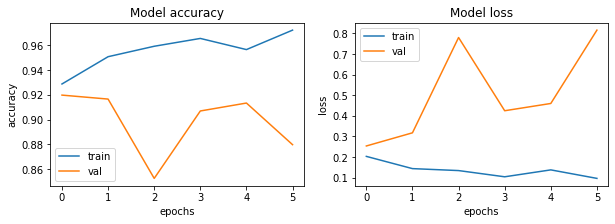

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(r.history[met])
    ax[i].plot(r.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# 2:1 Architecture without using Batch Normalization and Dropout

In [ ]:
!pip install optimizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for optimizers: filename=Optimizers-2.1-py3-none-any.whl size=2284 sha256=7a9f8ee0593daaa3659c464c018cdef2fb42ef5586d75ef305e94beae4976067
  Stored in directory: /root/.cache/pip/wheels/56/a5/4d/f679a391b5fca0b18c5e2fcd66ebff8900d97d6d95713915b9
Successfully built optimizers
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
#from keras.optimizers import SGD

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

# his = tf.keras.callbacks.History()
history=classifier.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 1000)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
163/163 [==============================] - 585s 3s/step - loss: 0.3642 - accuracy: 0.8332 - val_loss: 0.3426 - val_accuracy: 0.8622
Epoch 2/10
163/163 [==============================] - 61s 377ms/step - loss: 0.2335 - accuracy: 0.9051
Epoch 3/10
163/163 [==============================] - 61s 377ms/step - loss: 0.2139 - accuracy: 0.9160
Epoch 4/10
163/163 [==============================] - 60s 366ms/step - loss: 0.1972 - accuracy: 0.9208
Epoch 5/10
163/163 [==============================] - 61s 374ms/step - loss: 0.1700 - accuracy: 0.9356
Epoch 6/10
163/163 [==============================] - 60s 370ms/step - loss: 0.1735 - accuracy: 0.9319
Epoch 7/10
163/163 [==============================] - 60s 368ms/step - loss: 0.1620 - accuracy: 0.9379
Epoch 8/10
163/163 [==============================] - 60s 369ms/step - loss: 0.1604 - accuracy: 0.9396
Epoch 9/10
163/163 [==============================] - 60s 368ms/step - loss: 0.1425 - accuracy: 0.9465
Epoch 10/10
163/163 [============

Result Visualization

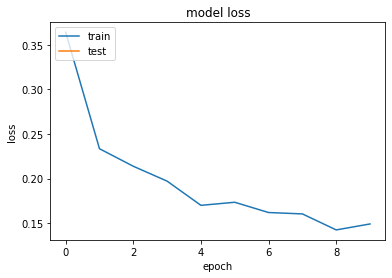

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

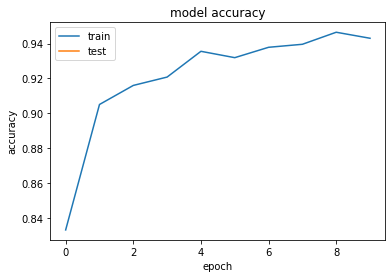

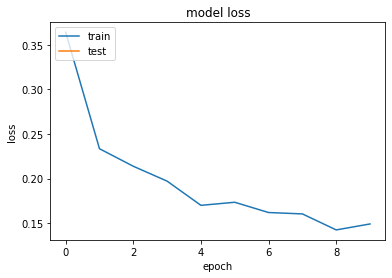

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 4:2 Achitecture using Batch Normalization and Dropout

In [ ]:
# !pip install BatchNormalization

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers
from tensorflow.keras.optimizers import SGD
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")

output_dim=10
batch_size = 128 
nb_epoch = 50
input_shape = (64, 64, 3)
#Initialize model
model = Sequential()

#CNN Layer 1
#input: 28X28 images with 1 channel -> (28X28X1) tensors.
#this applies 64 convolution filters of size 3X3 each.
model.add(ZeroPadding2D((1,1), input_shape=input_shape))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))

#CNN Layer 2
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.4))

#Flatten the output before feeding these to the fully connected Neurons                                    
model.add(Flatten())

#Fully connected Layers
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

#Using adam as our optimzer
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#Get a summary of the model.
print(model.summary())

#Compile the model
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 66, 66, 3)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 66, 66, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)      

In [ ]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=classifier.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 1000)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 67s 409ms/step - loss: 0.1486 - accuracy: 0.9446 - val_loss: 0.4771 - val_accuracy: 0.8237
Epoch 2/10
163/163 [==============================] - 61s 372ms/step - loss: 0.1429 - accuracy: 0.9427
Epoch 3/10
163/163 [==============================] - 61s 377ms/step - loss: 0.1394 - accuracy: 0.9475
Epoch 4/10
163/163 [==============================] - 62s 381ms/step - loss: 0.1321 - accuracy: 0.9515
Epoch 5/10
163/163 [==============================] - 61s 375ms/step - loss: 0.1385 - accuracy: 0.9459
Epoch 6/10
163/163 [==============================] - 60s 370ms/step - loss: 0.1324 - accuracy: 0.9486
Epoch 7/10
163/163 [==============================] - 61s 371ms/step - loss: 0.1325 - accuracy: 0.9505
Epoch 8/10
163/163 [==============================] - 61s 376ms/step - loss: 0.1296 - accuracy: 0.9494
Epoch 9/10
163/163 [==============================]

Result Visualization

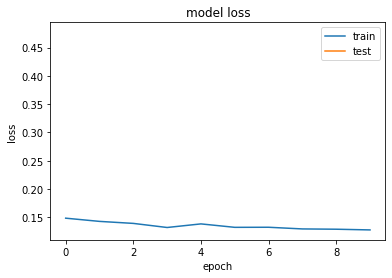

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='left')
plt.show()